<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-46/blob/main/Actividad_Semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 4
## Reduccion de datos
## Ciencia y analítica de datos
### Profesor: Jobish Vallikavungal Devassia
### Profesor Tutor: Roberto Antonio Guevara González
#### Bernardo Mijangos Flores
#### Matricula A01793654

# Primera parte

# Información de los datos

#### Esta investigación apuntó al caso de los pagos predeterminados de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de incumplimiento entre seis métodos de minería de datos. 

#### Esta investigación empleó una variable binaria, pago por defecto (Sí = 1, No = 0), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes 23 variables como variables explicativas:

#### X1: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).
#### X2: Género (1 = masculino; 2 = femenino).
#### X3: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
#### X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
#### X5: Edad (año).
#### X6 - X11: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera: X6 = el estado de pago en septiembre de 2005; X7 = el estado de pago en agosto de 2005; . . .;X11 = estado de amortización en abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.
#### X12-X17: Importe del estado de cuenta (dólar NT). X12 = monto del estado de cuenta en septiembre de 2005; X13 = monto del estado de cuenta en agosto de 2005; . . .; X17 = monto del estado de cuenta en abril de 2005.
#### X18-X23: Monto del pago anterior (dólar NT). X18 = monto pagado en septiembre de 2005; X19 = monto pagado en agosto de 2005; . . .;X23 = monto pagado en abril de 2005.

In [25]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  

In [3]:
# obtenemos la ruta de la informacion 

inPath = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [7]:
# generamos el dataframe

df = pd.read_csv(inPath, index_col = 0)
df.index.name = None
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [8]:
# revisamos la cantidad de registros y columnas

df.shape

(30000, 24)

# Limpieza de datos

se procede a quitar las variables categoricas dejando unicamente las numericas asi como la columa Y que es la variable de respuesta.

In [139]:
# Copiamos a un nuevo dataframe y obtenemos la lista de las columnas

ndf = df.copy()
ndf.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [140]:
# quitamos las variables categoricas segun la descripcion de los datos

lista = {'X2', 'X3', 'X4','X5','X6', 'X7', 'X8', 'X9', 'X10', 'X11','Y'}
ndf.drop(lista, 
         axis = 1, 
         inplace = True
        )

In [121]:
# revisamos de nuevo la informacion

ndf.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [141]:
ndf=(
    (ndf-ndf.min())/
    (ndf.max()-ndf.min()) 
).round(6)

In [142]:
# se realiza la correlacion de las variables

ndf.corr()

,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
X1,1.000000,0.285538,0.278409,0.283343,0.294063,0.295614,0.290475,0.195306,0.178432,0.210143,0.203256,0.217177,0.219585
X12,0.285538,1.000000,0.951480,0.892272,0.860264,0.829772,0.802641,0.140272,0.099320,0.156903,0.158272,0.167036,0.179309
X13,0.278409,0.951480,1.000000,0.928321,0.892475,0.859776,0.831588,0.280368,0.100818,0.150718,0.147371,0.157957,0.174222
X14,0.283343,0.892272,0.928321,1.000000,0.923968,0.883908,0.853317,0.244350,0.316918,0.130022,0.143376,0.179719,0.182291
X15,0.294063,0.860264,0.892475,0.923968,1.000000,0.940141,0.900940,0.233014,0.207531,0.300019,0.130157,0.160420,0.177594
X16,0.295614,0.829772,0.859776,0.883908,0.940141,1.000000,0.946194,0.217056,0.181212,0.252301,0.293084,0.141561,0.164140
X17,0.290475,0.802641,0.831588,0.853317,0.900940,0.946194,1.000000,0.199994,0.172635,0.233767,0.250215,0.307706,0.115453
X18,0.195306,0.140272,0.280368,0.244350,0.233014,0.217056,0.199994,1.000000,0.285601,0.252206,0.199589,0.148469,0.185757
X19,0.178432,0.099320,0.100818,0.316918,0.207531,0.181212,0.172635,0.285601,1.000000,0.244770,0.180097,0.180894,0.157618
X20,0.210143,0.156903,0.150718,0.130022,0.300019,0.252301,0.233767,0.252206,0.244770,1.000000,0.216343,0.159173,0.162739


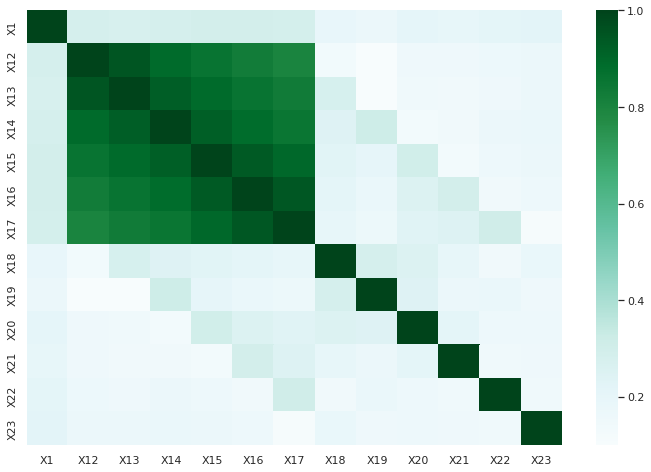

In [143]:
# para visualizar mejor la correlacion 

sns.set(rc={'figure.figsize':(12,8)}) 
misdatoscorr = ndf.corr()
ax = sns.heatmap(misdatoscorr, cmap="BuGn")
plt.show()

X13 y X12 tienen una correlacion muy alta al igual que X16 y X17

In [144]:
ndf.X1.mean().round(2)

0.16

In [145]:
Varience = np.cov([ndf.X1, ndf.X12])
Varience

array([[0.01717623,        nan],
       [       nan,        nan]])

In [146]:
ndf.var().sum()

0.040825682116302525

In [147]:
ndf.describe()

,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,30000.000000,29989.000000,29989.000000,29987.000000,29985.000000,29983.000000,29990.000000,29992.000000,29991.000000,29992.000000,29989.000000,29989.000000,29995.000000
mean,0.159075,0.191858,0.112904,0.112164,0.200903,0.120633,0.290858,0.006483,0.003516,0.005832,0.007773,0.011254,0.009867
std,0.131058,0.065168,0.067555,0.038082,0.060613,0.060297,0.045772,0.018962,0.013682,0.019651,0.025231,0.035826,0.033630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040404,0.149674,0.069054,0.087809,0.162332,0.082396,0.261944,0.001145,0.000496,0.000435,0.000477,0.000588,0.000223
50%,0.131313,0.166329,0.086347,0.097374,0.178084,0.098602,0.274105,0.002404,0.001193,0.002009,0.002415,0.003517,0.002837
75%,0.232323,0.205929,0.126984,0.119387,0.211533,0.130438,0.298794,0.005731,0.002969,0.005028,0.006464,0.009455,0.007566
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
